In [18]:
#comparing no shows by gender

import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

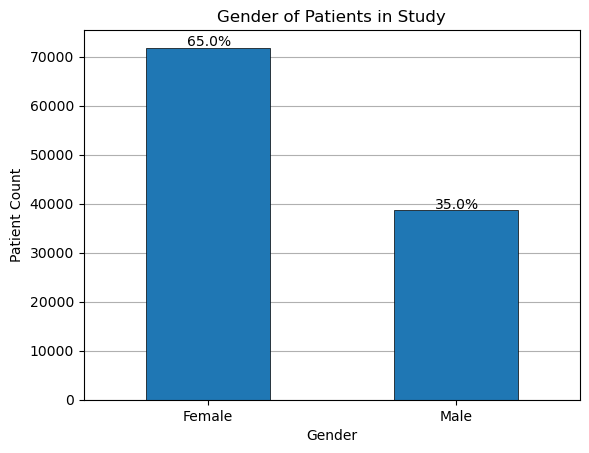

In [23]:

#plotting number of genders ratio
df = pd.read_csv('data_cleaned.csv')
grouped_by_gender = df.groupby('Gender')
num_genders = df['Gender'].value_counts()
ax = num_genders.plot(kind = 'bar',
            xlabel = 'Gender',
            ylabel = 'Patient Count',
            title = 'Gender of Patients in Study',
            edgecolor = 'black',
            linewidth = 0.5,
            rot = 0,)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xticklabels(['Female','Male'])
gender_percent = [round(100*num_genders['F'] / len(df['Gender']),2),
                                                   round(100*num_genders['M'] / len(df['Gender']),2)]
i=0
for p in ax.patches:
        ax.annotate(str(gender_percent[i]) + '%', (p.get_x() + p.get_width()/3, p.get_height() *1.005))
        i += 1

plt.savefig(r'C:\users\edpel\OneDrive\Desktop\Project1\gender_of_patients')


In [20]:
#calculate number of no shows by gender
no_shows_by_gender = df.groupby('Gender')['No_Show'].value_counts()
no_shows_by_gender = no_shows_by_gender.reset_index()
no_shows_by_gender

,Gender,No_Show,count
0,F,No,57245
1,F,Yes,14594
2,M,No,30962
3,M,Yes,7725


In [21]:
#proportion of no shows by gender
no_shows_by_gender_merged = pd.merge(no_shows_by_gender, num_genders, how = 'left', on='Gender')
no_shows_by_gender_merged['Proportion'] = no_shows_by_gender_merged['count_x'] / no_shows_by_gender_merged['count_y']
no_shows_by_gender_merged.rename(columns={'count_x' : 'Count', 'count_y' : 'Total'},inplace=True)
no_shows_by_gender_merged

,Gender,No_Show,Count,Total,Proportion
0,F,No,57245,71839,0.796851
1,F,Yes,14594,71839,0.203149
2,M,No,30962,38687,0.800321
3,M,Yes,7725,38687,0.199679


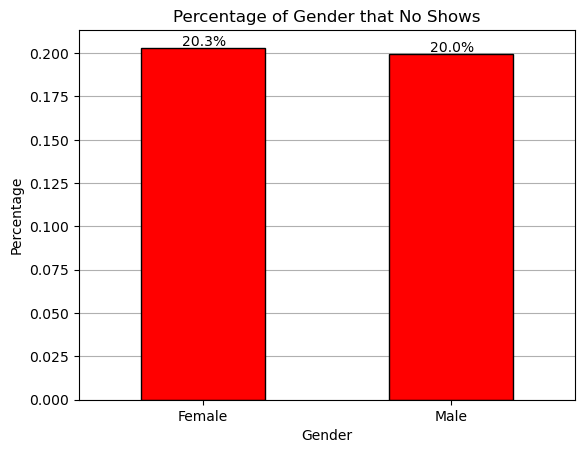

In [22]:
ax = no_shows_by_gender_merged[no_shows_by_gender_merged['No_Show']=='Yes'].plot(kind = 'bar',
                                                                                 x='Gender',
                                                                                 y='Proportion',
                                                                                 xlabel= 'Gender',
                                                                                 ylabel= 'Percentage',
                                                                                 title = 'Percentage of Gender that No Shows',
                                                                                 edgecolor = 'black',
                                                                                 color = 'red',
                                                                                 rot= 0,
                                                                                 legend=False
                                                                                )
ax.grid(axis='y')
ax.set_axisbelow(True)                                                                          
ax.set_xticklabels(['Female','Male'])                                                        
for p in ax.patches:
    ax.annotate(str( round(p.get_height()*100,1) )  + '%', (p.get_x()  + p.get_width()/3, p.get_height() * 1.005))                                                                                
                                                                                                                                                         
plt.savefig(r'C:\users\edpel\OneDrive\Desktop\Project1\no_show_proportions_for_each_gender')

In [ ]:
#Although our sample was overwhelmingly skewed towards female participants, it does not appear that there is any significance when comparing the genders' no-show rates.